<a href="https://colab.research.google.com/github/tbeucler/2022_ML_Earth_Env_Sci/blob/main/Lab_Notebooks/S1_4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

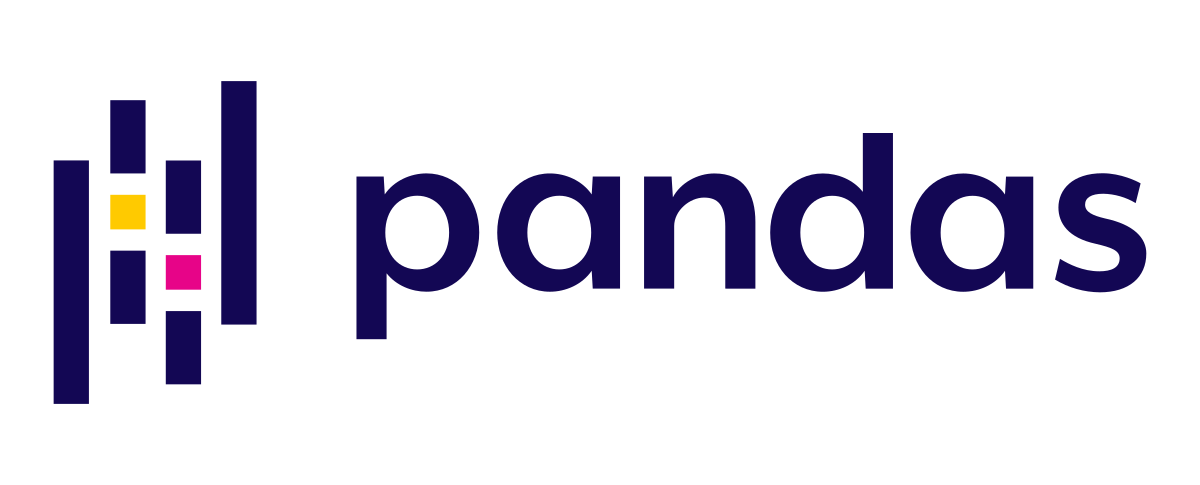

# Introduction

[Pandas](http://pandas.pydata.org/) is a an open source library providing high-performance, easy-to-use data structures and data analysis tools. Pandas is particularly suited to the analysis of *tabular* data, i.e. data that can can go into a table. In other words, if you can imagine the data in an Excel spreadsheet, then Pandas is the tool for the job.

A [2017 recent analysis](https://stackoverflow.blog/2017/09/06/incredible-growth-python/) of questions from Stack Overflow showed that python was the fastest growing and most widely used programming language in the world (in developed countries). As of 2021, the growth has now leveled off, but Python remains at the top.

SO_language_growth_2021.svg

[Link to generate your own version of this figure](https://insights.stackoverflow.com/trends?tags=java%2Cc%2Cc%2B%2B%2Cpython%2Cc%23%2Cvb.net%2Cjavascript%2Cassembly%2Cphp%2Cperl%2Cruby%2Cvb%2Cswift%2Cr%2Cobjective-c)

A [follow-up analysis](https://149351115.v2.pressablecdn.com/wp-content/uploads/2017/09/related_tags_over_time-1-2000x2000.png) showed that this growth is driven by the data science packages such as `numpy`, `matplotlib`, and especially `pandas`.

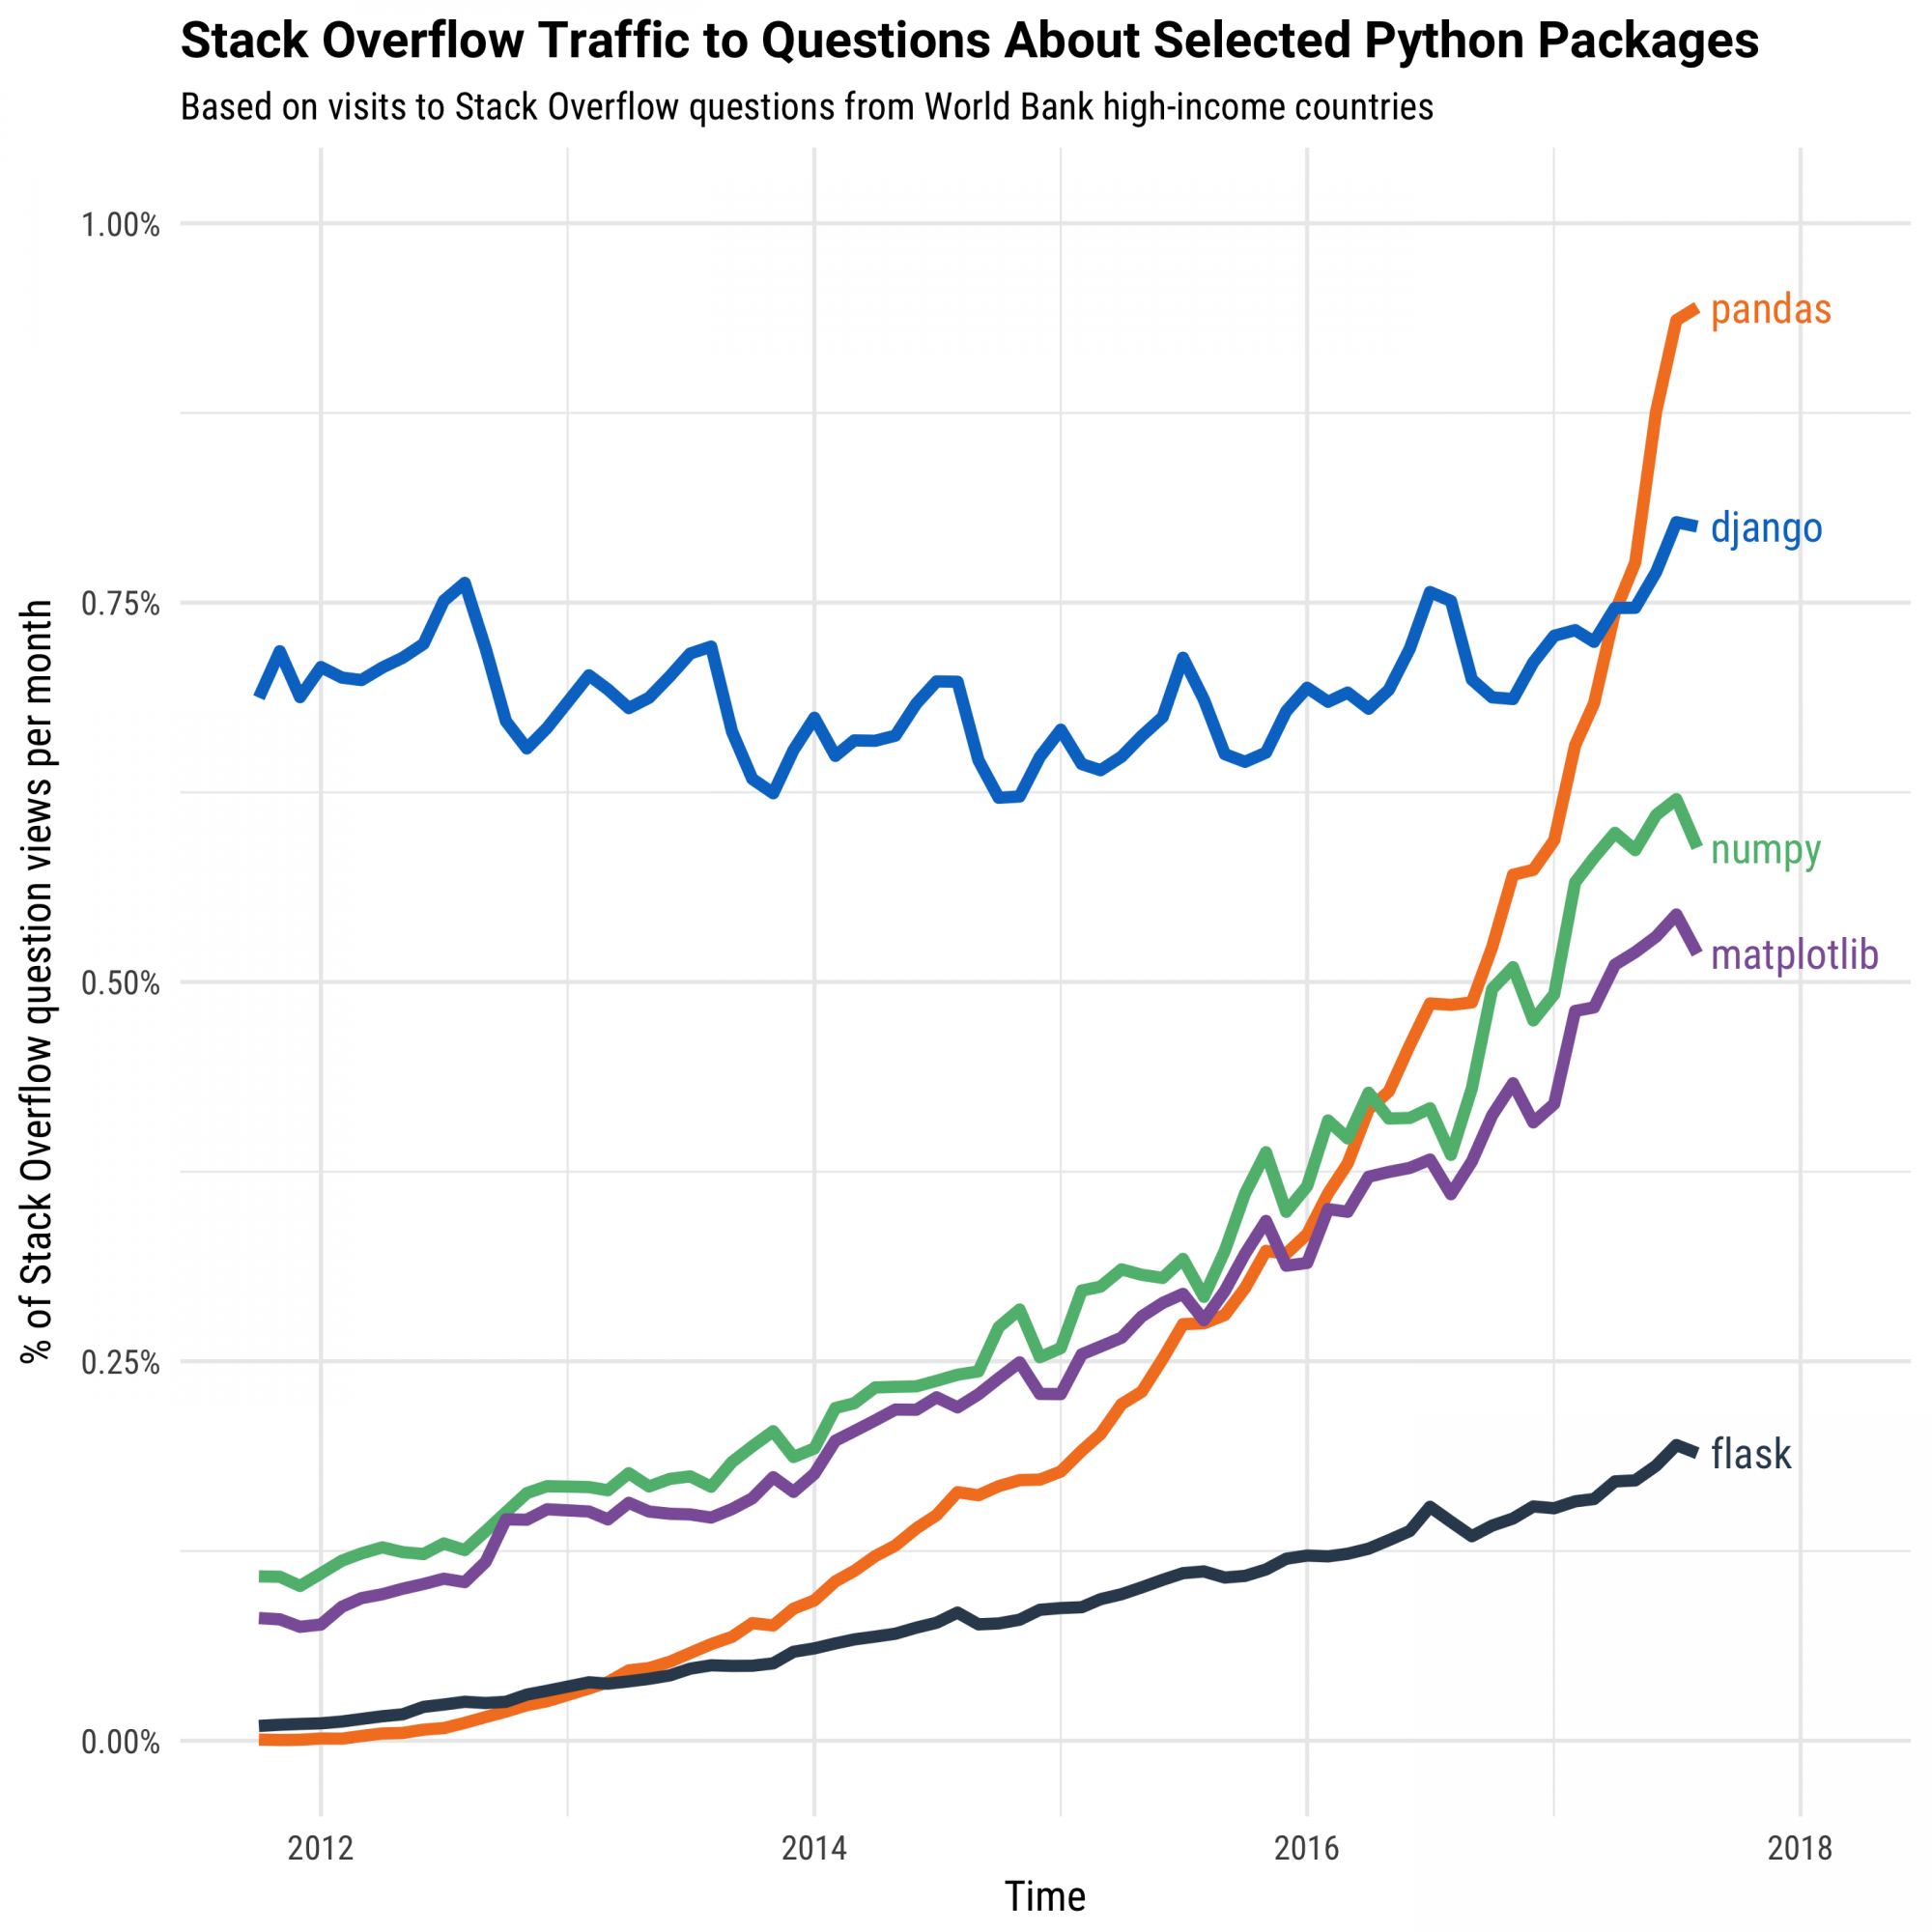

The exponential growth of pandas is due to the fact that it *just works*. It saves you time and helps you do science more efficiently and effectively.

**Pandas capabilities** (from the [Pandas website](https://pandas.pydata.org/)):

* A fast and efficient DataFrame object for data manipulation with integrated indexing;

* Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;

* Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;

* Flexible reshaping and pivoting of data sets;

* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;

* Columns can be inserted and deleted from data structures for size mutability;

* Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;

* High performance merging and joining of data sets;

* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;

* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;

* Highly optimized for performance, with critical code paths written in Cython or C.

* Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

In this notebook, we will go over the basic capabilities of Pandas. It is a very deep library, and you will need to dig into the [documentation](http://pandas.pydata.org/pandas-docs/stable/) for more advanced usage.

`Pandas` was created by [Wes McKinney](http://wesmckinney.com/). Many of the examples here are drawn from Wes McKinney’s book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do), which includes "a GitHub repo of [code samples](https://github.com/wesm/pydata-book).

# Pandas Data Structures: Series

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

A `Series` represents a one-dimensional array of data. The main difference between a `Series` and `numpy` array is that a `Series` has an index. The index contains the labels that we use to access the data.

There are many ways to create a `Series`. We will just show a few.

(Data are from the NASA [Planetary Fact Sheet](https://nssdc.gsfc.nasa.gov/planetary/factsheet/).)

In [ ]:
names = ['Mercury', 'Venus', 'Earth']
values = [0.3e24, 4.87e24, 5.97e24]
masses = pd.Series(values, index=names)
masses

Series have built in plotting methods.

In [ ]:
masses.plot(kind='bar')

Arithmetic operations and most `numpy` function can be applied to Series. An important point is that the Series keep their index during such operations.

In [ ]:
np.log(masses) / masses**2

We can access the underlying index object if we need to:

In [ ]:
masses.index

## Indexing

We can get values back out using the index via the `.loc` attribute

In [ ]:
masses.loc['Earth']

Or by raw position using `.iloc`

In [ ]:
masses.iloc[2]

We can pass a list or array to loc to get multiple rows back:

In [ ]:
masses.loc[['Venus', 'Earth']]

And we can even use slice notation

In [ ]:
masses.loc['Mercury':'Earth']

In [ ]:
masses.iloc[:2]

If we need to, we can always get the raw data back out as well

In [ ]:
masses.values # a numpy array

In [ ]:
masses.index # a pandas Index object

<a name="DataFrame"></a>
# Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single “column”. A more useful Pandas data structure is the DataFrame. A DataFrame is basically a bunch of series that share the same index. It’s a lot like a table in a spreadsheet.

Below we create a DataFrame.

In [ ]:
# first we create a dictionary
data = {'mass': [0.3e24, 4.87e24, 5.97e24],       # kg
        'diameter': [4879e3, 12_104e3, 12_756e3], # m
        'rotation_period': [1407.6, np.nan, 23.9] # h
       }
df = pd.DataFrame(data, index=['Mercury', 'Venus', 'Earth'])
df

Pandas handles missing data very elegantly, keeping track of it through all calculations.

In [ ]:
df.info()

A wide range of statistical functions are available on both `Series` and `DataFrames`.

In [ ]:
df.min()

In [ ]:
df.mean()

In [ ]:
df.std()

In [ ]:
df.describe()

We can get a single column as a `Series` using python’s `getitem` syntax on the `DataFrame` object.

In [ ]:
df['mass']

…or using attribute syntax.

In [ ]:
df.mass

Indexing works very similar to series

In [ ]:
df.loc['Earth']

In [ ]:
df.iloc[2]

But we can also specify the column we want to access

In [ ]:
df.loc['Earth', 'mass']

In [ ]:
df.iloc[:2, 0]

If we make a calculation using columns from the `DataFrame`, it will keep the same index:

In [ ]:
volume =  4/3 * np.pi * (df.diameter/2)**3
df.mass / volume

Which we can easily add as another column to the `DataFrame`:

In [ ]:
df['density'] = df.mass / volume
df

<a name="Merging_Data"></a>
# Merging Data

Pandas supports a wide range of methods for merging different datasets. These are described extensively in the [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Here we just give a few examples.

In [ ]:
temperature = pd.Series([167, 464, 15, -65],
                     index=['Mercury', 'Venus', 'Earth', 'Mars'],
                     name='temperature')
temperature

In [ ]:
# returns a new DataFrame
df.join(temperature)

In [ ]:
# returns a new DataFrame
df.join(temperature, how='right')

In [ ]:
# returns a new DataFrame
everyone = df.reindex(['Mercury', 'Venus', 'Earth', 'Mars'])
everyone

We can also index using a boolean series. This is very useful:

In [ ]:
adults = df[df.mass > 4e24]
adults

In [ ]:
df['is_big'] = df.mass > 4e24
df

# Modifying Values

We often want to modify values in a dataframe based on some rule. To modify values, we need to use `.loc` or `.iloc`

In [ ]:
df.loc['Earth', 'mass'] = 5.98+24
df.loc['Venus', 'diameter'] += 1
df

# Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in.

In [ ]:
df.plot(kind='scatter', x='mass', y='diameter', grid=True)

In [ ]:
df.plot(kind='bar')

# Time `Index`es

Indexes are very powerful. They are a big part of why `Pandas` is so useful. There are different indexes for different types of data. Time indexes are especially great!

In [ ]:
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')
timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       index=two_years)
timeseries.plot()

We can use python’s slicing notation inside `.loc` to select a date range.

In [ ]:
timeseries.loc['2015-01-01':'2015-07-01'].plot()

The `TimeIndex` object has lots of useful attributes

In [ ]:
timeseries.index.month

In [ ]:
timeseries.index.day

<a name="Weather"></a>
# Reading Data Files: Weather Station Data

In this example, we will use NOAA weather station data from https://www.ncdc.noaa.gov/data-access/land-based-station-data.

The details of files we are going to read are described in this README file.

In [ ]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    base_url="doi:10.5281/zenodo.5564850/",
    registry={
        "data.txt": "md5:5129dcfd19300eb8d4d8d1673fcfbcb4",
    },
)
datafile = POOCH.fetch("data.txt")
datafile

In [ ]:
! head '/root/.cache/noaa-data/data.txt' # Replace this value with the download path indicated above

We now have a text file on our hard drive called `data.txt`.

To read it into `pandas`, we will use the `read_csv` function. This function is incredibly complex and powerful. You can use it to extract data from almost any text file. However, you need to understand how to use its various options.

With no options, this is what we get.

In [ ]:
df = pd.read_csv(datafile)
df.head()

Pandas failed to identify the different columns. This is because it was expecting standard [`CSV` (comma-separated values)](https://en.wikipedia.org/wiki/Comma-separated_values) file. In our file, instead, the values are separated by whitespace. And not a single whilespace–the amount of whitespace between values varies. We can tell pandas this using the `sep` keyword.

In [ ]:
df = pd.read_csv(datafile, sep='\s+')
df.head()

Great! It worked.

If we look closely, we will see there are lots of -99 and -9999 values in the file. The README file tells us that these are values used to represent missing data. Let’s tell this to pandas.

In [ ]:
df = pd.read_csv(datafile, sep='\s+', na_values=[-9999.0, -99.0])
df.head()

Wonderful. The missing data is now represented by `NaN`.

What data types did pandas infer?

In [ ]:
df.info()

One problem here is that pandas did not recognize the `LDT_DATE` column as a date. Let’s help it.

In [ ]:
df = pd.read_csv(datafile, sep='\s+',
                 na_values=[-9999.0, -99.0],
                 parse_dates=[1])
df.info()

It worked! Finally, let’s tell pandas to use the date column as the index.

In [ ]:
df = df.set_index('LST_DATE')
df.head()

We can now access values by time:

In [ ]:
df.loc['2017-08-07']

Or use slicing to get a range:

In [ ]:
df.loc['2017-07-01':'2017-07-31']

# Quick statistics

In [ ]:
df.describe()

<a name="Plotting_Values"></a>
# Plotting Values

We can now quickly make plots of the data

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(14,14))

df.iloc[:, 4:8].boxplot(ax=ax[0,0])
df.iloc[:, 10:14].boxplot(ax=ax[0,1])
df.iloc[:, 14:17].boxplot(ax=ax[1,0])
df.iloc[:, 18:22].boxplot(ax=ax[1,1])


ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90);

Pandas is very “time aware”:

In [ ]:
df.T_DAILY_MEAN.plot()

**Note:** we could also manually create an axis and plot into it.

In [ ]:
fig, ax = plt.subplots()
df.T_DAILY_MEAN.plot(ax=ax)
ax.set_title('Pandas Made This!')

In [ ]:
df[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

# Resampling

Since `pandas` understands time, we can use it to do resampling.

In [ ]:
# monthly reampler object
rs_obj = df.resample('MS')
rs_obj

In [ ]:
rs_obj.mean()

We can chain all of that together

In [ ]:
df_mm = df.resample('MS').mean()
df_mm[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

**And this concludes this notebook's tutorial 😀**

If you would like to learn more about `pandas`, check out the [`groupby` tutorial](https://earth-env-data-science.github.io/lectures/pandas/pandas_groupby.html) from the [Earth and Environmental Data Science book](https://earth-env-data-science.github.io/intro.html), the [Github repository](https://github.com/wesm/pydata-book) of the [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do), or the [`pandas` community tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html).

# Exercise 4: Analyzing Earthquake Data with `Pandas`

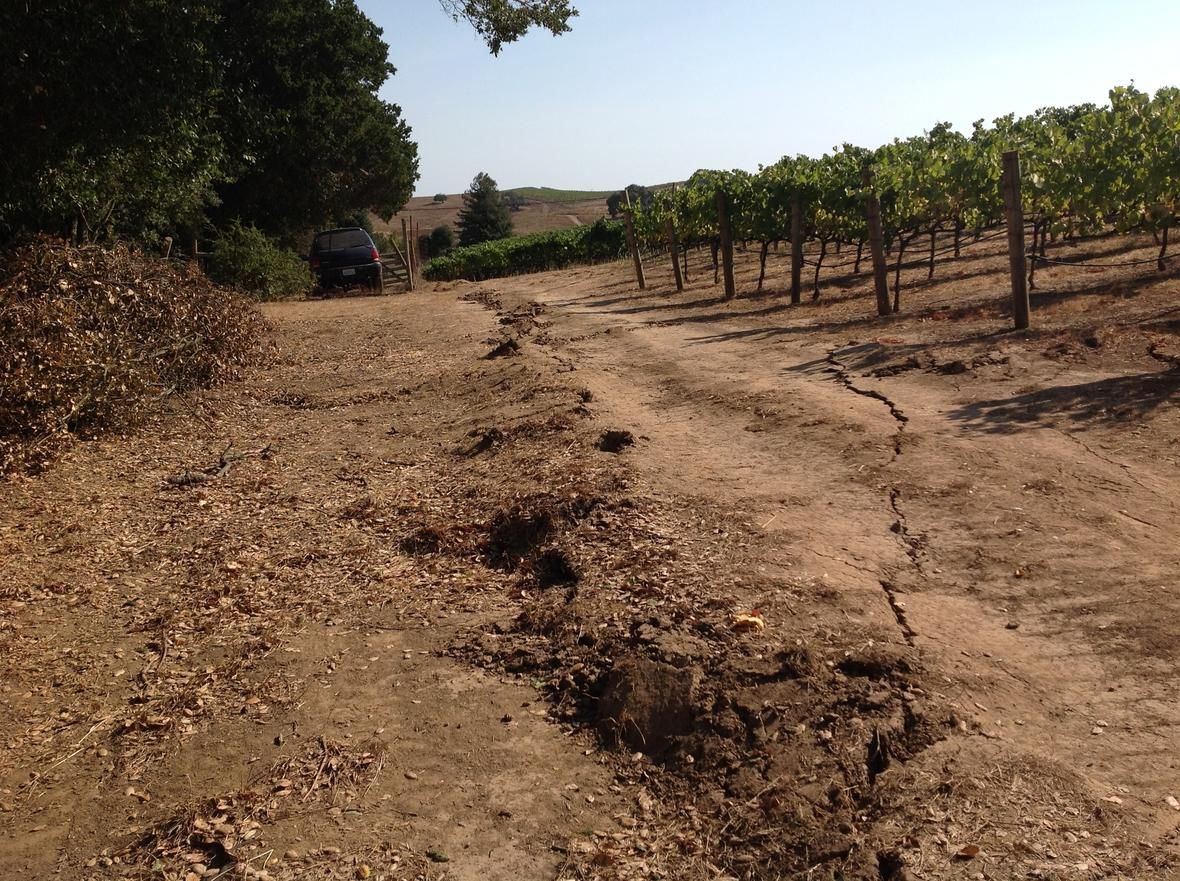

**2014 South Napa CA M6 Earthquake - August 24**

Continuous "mole-track" running parallel to the strike of the fault indicates some E-W compression in addition to [right-lateral faulting](https://www.usgs.gov/faqs/what-fault-and-what-are-different-types). Photo taken near Buhman Rd.

Source: *USGS*

In this assignment, we will review `pandas` fundamentals, such as how to

* Open csv files

* Manipulate dataframe indexes

* Parse date columns

* Examine basic dataframe statistics

* Manipulate text columns and extract values

* Plot dataframe contents using 
<ul type="circle">
<li>Bar charts</li>
<li>Histograms</li>
<li>Scatter plots</li>
</ul>

Data for this assignment in .csv format downloaded from the USGS Earthquakes Database is available at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

You don’t need to download this file. You can open it directly with Pandas.

**Q1) First, import `Numpy`, `Pandas` and `Matplotlib` and (optional) set the display options.**

Hint: Display options are documented [at this link](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)

In [ ]:
# Import all libraries here 

**Q2) Use Pandas’ `read_csv` function directly on this URL to open it as a `DataFrame`**

Hint: Check out the [DataFrame section](#DataFrame)

In [ ]:
# Open the URL as a Pandas' DataFrame

In [ ]:
# Display the first few rows

In [ ]:
# Display the DataFrame info

The dates were not automatically parsed into `datetime` types!
What can we do?

**Q3) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index**

Hint: Check out the [Reading Data Files example](#Weather)

In [ ]:
# Re-read the URL

In [ ]:
# Use the `head` function to check that it worked

In [ ]:
# Use the `info` function to check that it worked

**Q4) Use `describe` to get the basic statistics of all the columns**

Hint: The documentation of `describe` is [at this link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [ ]:
# Use the `describe` function

In [ ]:
# Note the highest and lowest magnitude of earthquakes in the database

**Q5) Use `nlargest` to get the top 20 earthquakes by magnitude**

Hint: The documentation of `nlargest` is [at this link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html)

In [ ]:
# Use `nlargest`

In [ ]:
# Examine the structure of the `place` column.

The state / country information seems to be in there. How would you get it out?

**Q6) Extract the state or country using `Pandas` text data functions, and add it as a new column to the `DataFrame`**

Hint 1: The documentation for Pandas' text data functions is [here](https://pandas.pydata.org/pandas-docs/stable/text.html)

Hint 2: The [DataFrame section](#DataFrame) has helpful information

In [ ]:
# Extract the state or country

In [ ]:
# Add it as a new column to the `DataFrame` called `country`

**Q7) Display each unique value from the new `country` column**

Hint: You may use the `unique` function documented [at this link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)

In [ ]:
# Display unique values

**Q8) Create a filtered dataset that only has earthquakes of magnitude 4 or larger**

Hint: Check out the ["Merging Data" Section](#Merging_Data)

In [ ]:
# Filter the dataset based on the earthquakes' magnitudes

**Q9) Using the filtered dataset (magnitude $\geq$ 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes**

Hint 1: `Pandas` has a `count` function documented [at this link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html)

Hint 2: Check out the [Plotting Values Section](#Plotting_Values)

In [ ]:
# Count the number of earthquakes whose magnitudes are larger or equal to 4

In [ ]:
# Make a bar chart of this number 

**Q10) Make a histogram for the distribution of the earthquakes' magnitudes**

Hint: `Pandas` has a histogram function documented [at this link](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html) and `Matplotlib` has one documented [at this link](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)

In [ ]:
# Make the histogram

In [ ]:
# Use a logarithmic scale

In [ ]:
# Make one histogram for the filtered dataset, and one for the unfiltered dataset

Do you see a relationship?

**Q11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude**

Hint: Consider reading the documentation for [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to make the scatter plot and that of [`plt.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) to color the points by magnitude. 

In [ ]:
# You can use a two-column subplot with 
# both the filtered/unfiltered datasets
# to facilitate their comparison.

Do you notice a difference between filtered and unfiltered datasets?